<a id="1"></a>
<h1 style="color:White; background-color:#0b6b6e; font-size:250%; text-align:center; border-radius: 10px; padding-top: 10px; padding-bottom: 10px">Model Deployment and Prediction</h1>

<a id="1"></a>
<h1 style="color:White; background-color:#0b6b6e; font-size:250%; text-align:left; border-radius: 10px; padding-top: 10px; padding-bottom: 10px">1. Import Library</h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.metrics import make_scorer, plot_confusion_matrix, confusion_matrix, classification_report, f1_score, precision_score, recall_score, matthews_corrcoef, roc_auc_score

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import SelectPercentile
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import OneHotEncoder

from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression

import pickle
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('campaign_clean.csv').drop('Unnamed: 0', axis=1)
df.head(3)

,age,job,marital,education,housing,loan,month,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,label
0,56,housemaid,married,basic.4y,no,no,may,1,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,no,no,may,1,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,yes,no,may,1,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [3]:
df['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'mar', 'apr',
       'sep'], dtype=object)

In [4]:
X = df.drop('label', axis=1)
y = df['label']

In [5]:
### Pipeline
num_scale_trans = Pipeline(steps=[
    ('scaler', MinMaxScaler()),
])


num_poly_trans = Pipeline(steps=[
    ('poly', PolynomialFeatures(degree=3))])


cat_trans = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])



preprocessor_1_poly = ColumnTransformer([
        ('num_scale_trans', num_scale_trans,['emp.var.rate','euribor3m','nr.employed','cons.price.idx','cons.conf.idx','age', 'campaign', 'pdays', 'previous']),
        ('num_poly_trans', num_poly_trans,['emp.var.rate','euribor3m','nr.employed','cons.price.idx','cons.conf.idx','age', 'campaign', 'pdays', 'previous']),
        ('cat', cat_trans, ['marital','housing','loan', 'poutcome','job', 'education', 'month'])
])
     
    


In [6]:
logreg_poly_select_tuned = Pipeline(steps=[('preprocessor_1_poly', preprocessor_1_poly),
                                ('select', SelectPercentile(percentile=30)),
                                ('logreg', LogisticRegression(solver='newton-cg', penalty='l2', max_iter=100,random_state = 2020))])

<a id="1"></a>
<h1 style="color:White; background-color:#0b6b6e; font-size:250%; text-align:left; border-radius: 10px; padding-top: 10px; padding-bottom: 10px">2. Write and Save</h1>

## Pickle Save

In [7]:
logreg_poly_select_tuned.fit(X,y)

Pipeline(steps=[('preprocessor_1_poly',
                 ColumnTransformer(transformers=[('num_scale_trans',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['emp.var.rate', 'euribor3m',
                                                   'nr.employed',
                                                   'cons.price.idx',
                                                   'cons.conf.idx', 'age',
                                                   'campaign', 'pdays',
                                                   'previous']),
                                                 ('num_poly_trans',
                                                  Pipeline(steps=[('poly',
                                                                   PolynomialFeatures(degree=3))]),
                                                  ['emp.va

In [8]:
filename = 'logreg_poly_select.sav'
pickle.dump(logreg_poly_select_tuned, open(filename, 'wb'))

<a id="1"></a>
<h1 style="color:White; background-color:#0b6b6e; font-size:250%; text-align:left; border-radius: 10px; padding-top: 10px; padding-bottom: 10px">3. Read and Load</h1>

## Pickle Load

In [9]:
loaded_model = pickle.load(open(filename, 'rb'))

In [10]:
loaded_model

Pipeline(steps=[('preprocessor_1_poly',
                 ColumnTransformer(transformers=[('num_scale_trans',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['emp.var.rate', 'euribor3m',
                                                   'nr.employed',
                                                   'cons.price.idx',
                                                   'cons.conf.idx', 'age',
                                                   'campaign', 'pdays',
                                                   'previous']),
                                                 ('num_poly_trans',
                                                  Pipeline(steps=[('poly',
                                                                   PolynomialFeatures(degree=3))]),
                                                  ['emp.va

In [11]:
campaign_X = df.drop('label', axis=1)
campaign_y = df['label']

In [12]:
y_pred_test = loaded_model.predict(campaign_X)

In [13]:
print(classification_report(campaign_y, y_pred_test))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95     33987
           1       0.71      0.17      0.28      4258

    accuracy                           0.90     38245
   macro avg       0.81      0.58      0.61     38245
weighted avg       0.88      0.90      0.87     38245



In [14]:
df_cm = pd.DataFrame(confusion_matrix(campaign_y, y_pred_test))

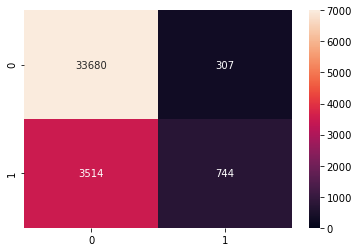

In [15]:
sns.heatmap(df_cm, annot=True, vmin=0, vmax=7000, fmt='1')
plt.show()

In [16]:
df[df['label']==1]

,age,job,marital,education,housing,loan,month,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,label
64,41,blue-collar,divorced,basic.4y,yes,no,may,1,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,1
70,49,entrepreneur,married,university.degree,yes,no,may,1,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,1
75,49,technician,married,basic.9y,no,no,may,1,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,1
108,41,technician,married,professional.course,yes,no,may,1,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,1
117,45,blue-collar,married,basic.9y,yes,no,may,1,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38232,62,retired,married,university.degree,yes,no,nov,1,1,6,success,-1.1,94.767,-50.8,1.031,4963.6,1
38235,62,retired,married,university.degree,no,no,nov,2,1,3,success,-1.1,94.767,-50.8,1.031,4963.6,1
38238,37,admin.,married,university.degree,yes,no,nov,1,0,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
38240,73,retired,married,professional.course,yes,no,nov,1,0,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1


In [ ]:
SELECT education, AVG(age) as averageAge FROM campaign WHERE label=1 GROUP BY education ORDER BY averageAge DESC;

<a id="1"></a>
<h1 style="color:White; background-color:#0b6b6e; font-size:250%; text-align:left; border-radius: 10px; padding-top: 10px; padding-bottom: 10px">4. New Data Prediction</h1>

In [17]:
# New Data Prediction

In [18]:
new_data = pd.DataFrame({
    'age': [21],
    'job': ['student'],
    'marital':['single'],
    'education':['high.school'],
    'housing':['no'],
    'loan':['no'],
    'month': ['mar'],
    'campaign':[1],
    'pdays': [0],
    'previous': [0],
    'poutcome': ['noneexistent'],
    'emp.var.rate': [-1.8],
    'cons.price.idx': [92.843],
    'cons.conf.idx': [-50.0],
    'euribor3m': [1.614],
    'nr.employed': [5099.1]
})

In [19]:
df.iloc[117]

age                        45
job               blue-collar
marital               married
education            basic.9y
housing                   yes
loan                       no
month                     may
campaign                    1
pdays                       0
previous                    0
poutcome          nonexistent
emp.var.rate              1.1
cons.price.idx         93.994
cons.conf.idx           -36.4
euribor3m               4.857
nr.employed              5191
label                       1
Name: 117, dtype: object

In [20]:
new_data2 = pd.DataFrame({
    'age': [45],
    'job': ['blue-collar'],
    'marital':['married'],
    'education':['basic.9y'],
    'housing':['yes'],
    'loan':['no'],
    'month': ['may'],
    'campaign':[1],
    'pdays': [0],
    'previous': [0],
    'poutcome': ['nonexistent'],
    'emp.var.rate': [1.1],
    'cons.price.idx': [93.994],
    'cons.conf.idx': [-36.4],
    'euribor3m': [4.857],
    'nr.employed': [5191]
})

In [64]:
df.iloc[37285]

age                              83
job                         retired
marital                     married
education         university.degree
housing                          no
loan                             no
month                           jul
campaign                          1
pdays                             1
previous                          1
poutcome                    success
emp.var.rate                   -1.7
cons.price.idx               94.215
cons.conf.idx                 -40.3
euribor3m                     0.835
nr.employed                  4991.6
label                             1
Name: 37285, dtype: object

In [65]:
new_data3 = pd.DataFrame({
    'age': [83],
    'job': ['retired'],
    'marital':['married'],
    'education':['university.degree'],
    'housing':['no'],
    'loan':['no'],
    'month': ['jul'],
    'campaign':[1],
    'pdays': [1],
    'previous': [1],
    'poutcome': ['success'],
    'emp.var.rate': [-1.7],
    'cons.price.idx': [94.215],
    'cons.conf.idx': [-40.3],
    'euribor3m': [0.835],
    'nr.employed': [4991.6]
})

In [66]:
loaded_model.predict(new_data3)

array([1], dtype=int64)

In [67]:
proba = loaded_model.predict_proba(new_data3)[:,1]

if proba >= 0.61:
    print('Potential')
else:
    print('Non Potential')
    
print(f'Probability to Subscribe:', proba)

Potential
Probability to Subscribe: [0.83102257]
